# Modelling 

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


**Theory Reminder**
- Unsupervised learning: estimating functions withouut the aid of outcome variable y. We only observe X and want to learn sth about its structure
 - Supervised machine learning: estimating function with known observations and outcome data (guess the values of y from the X variables). Useful for observations for which y is unknown and X is known ??
 - Supervised machine learning and/or econometrics: build a predictive model for a variable of interest, using explanatory variables (or features)
     - Econometrics: probabilisic models designed to describe economic phenomena
    - Machine Learning: algorithms search through a set of possible prediction models that capture the best relationship

**Supervised ML**
- typical supervised ML procedure:
    1. Labeled data: decompose the observations in test/training set and pre-processing of the input variables
    2. Learning: on a restricted sample: the training set; use an alogorithm to "learn" the association pattern between the input variables and the label
    3. Assessing how the model fits the data (and choosing the best model): test the validity of the model on a test set (sample of the labeled data that had been held out); fit measured using the mean squarred error"
    4. Training the best model on the full data
    5. Using the trained model for prediction tasks
  

# Loading the data

In [60]:
df=pd.read_excel("C:/Users/32498/Downloads/ECON2206-Data-Management-2023-main/GitHub/Project-data/Abritel_merged.xlsx")
df

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122,1592,4.5,51,Particulier,7,3,7,Koksijde-Bad,51.118739,2.634960
1,Chalet confortable logé en forêt près de Durbuy,Chalet,1,114,1477,4.7,59,Particulier,5,2,4,Barvaux,50.350609,5.493284
2,"Bel appartement pour 2 personnes avec WIFI, TV...",Appartement,0,77,1005,5.0,1,Annonce professionnelle,2,1,0,Bredene,51.238941,2.972449
3,Magnifique appartement vue sur mer,Appartement,0,175,2274,0.0,0,Particulier,5,2,4,Albertstrand,51.346426,3.275348
4,Près du Parlement Européen - Appartement rénov...,Appartement,1,100,1298,4.7,94,Particulier,5,2,3,European Quarter,50.842350,4.383945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,3 N appartement,Appartement,0,113,1472,0.0,0,Particulier,6,2,1,Eupen,50.630567,6.031272
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165,2143,0.0,0,Annonce professionnelle,2,1,0,Sint-Andries,51.192022,3.178019
420,Villa Oostduinkerke,Villa,0,89,1156,0.0,0,Particulier,6,3,4,Oostduinkerke,51.115634,2.681266
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129,1678,3.5,2,Particulier,4,2,3,Collignon,50.867604,4.373712


In [49]:
df['Price per Night']=df['Price per Night'].astype(float)
df['Total Price']=df['Total Price'].astype(float)
df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)
#mapping = {'Annonce professionnelle': 1, 'Particulier': 0, 'rien': 'None'}
#df['Type of annoucement'] = df['Type of annoucement'].map(mapping)
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude
418,3 N appartement,Appartement,0,113.0,1472.0,0.0,0.0,Particulier,6.0,2.0,1.0,Eupen,50.630567,6.031272
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165.0,2143.0,0.0,0.0,Annonce professionnelle,2.0,1.0,0.0,Sint-Andries,51.192022,3.178019
420,Villa Oostduinkerke,Villa,0,89.0,1156.0,0.0,0.0,Particulier,6.0,3.0,4.0,Oostduinkerke,51.115634,2.681266
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129.0,1678.0,3.5,2.0,Particulier,4.0,2.0,3.0,Collignon,50.867604,4.373712
422,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,216.0,2809.0,3.3,3.0,Annonce professionnelle,2.0,1.0,1.0,Quartier du Centre - Centrumwijk,50.846718,4.353221


In [50]:
print(df.dtypes)

Name                    object
Type                    object
hote premium             int64
Price per Night        float64
Total Price            float64
Rating                 float64
Appreciations          float64
Type of annoucement     object
Number of Guests       float64
Number of Bedrooms     float64
Number of Beds         float64
lieu                    object
latitude               float64
longitude              float64
dtype: object


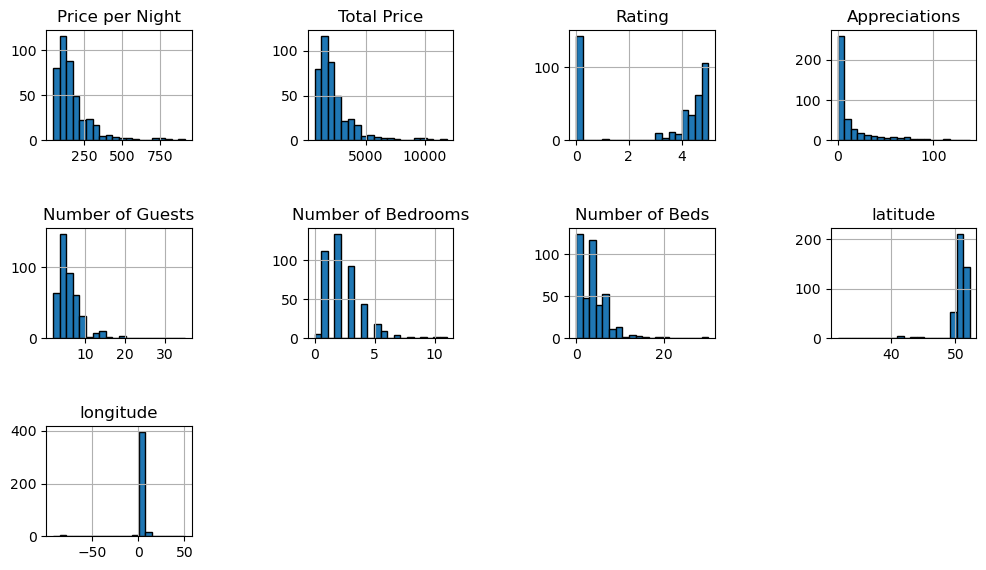

In [51]:
df_numerical = df.select_dtypes(include='float')

df_numerical.hist(bins=20, figsize=(12, 22), edgecolor="black",
                    layout=(9, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

# Econometrics regression

In [52]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML

warnings.filterwarnings("ignore")

$$\PriceperNight = \alpha + \beta_1 \texttt{Rating} + \beta_2 \texttt{Number of Guests} + \epsilon $$

In [53]:
df['lnprice']=np.log(df['Price per Night'])
#df=df.rename(columns={'Number of Guests':'nb_guests'})
df.head()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,lnprice
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122.0,1592.0,4.5,51.0,Particulier,7.0,3.0,7.0,Koksijde-Bad,51.118739,2.634960,4.804021
1,Chalet confortable logé en forêt près de Durbuy,Chalet,1,114.0,1477.0,4.7,59.0,Particulier,5.0,2.0,4.0,Barvaux,50.350609,5.493284,4.736198
2,"Bel appartement pour 2 personnes avec WIFI, TV...",Appartement,0,77.0,1005.0,5.0,1.0,Annonce professionnelle,2.0,1.0,0.0,Bredene,51.238941,2.972449,4.343805
3,Magnifique appartement vue sur mer,Appartement,0,175.0,2274.0,0.0,0.0,Particulier,5.0,2.0,4.0,Albertstrand,51.346426,3.275348,5.164786
4,Près du Parlement Européen - Appartement rénov...,Appartement,1,100.0,1298.0,4.7,94.0,Particulier,5.0,2.0,3.0,European Quarter,50.842350,4.383945,4.605170


Faudrait prendre le rating qu'on a clean dans la partie visualisation je crois. Ou au moins supprimé le zéro

In [54]:
sorted_df = df.copy()
sorted_df = df.sort_values('Rating', ascending=True)
sorted_df = sorted_df[sorted_df['Rating'] != 0]
sorted_df = sorted_df.rename(columns={'Number of Guests': 'nb_guests'})
sorted_df = sorted_df.rename(columns={'hote premium': 'premium'})

In [55]:
reg = smf.ols(formula='lnprice~Rating+nb_guests+premium', data=sorted_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     51.34
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.13e-26
Time:                        17:24:48   Log-Likelihood:                -172.08
No. Observations:                 280   AIC:                             352.2
Df Residuals:                     276   BIC:                             366.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9618      0.189     21.007      0.000       3.591       4.333
Rating         0.1291      0.042      3.100      0.002       0.047       0.211
nb_guests      0.0811      0.007     11.406      0.000       0.067       0.095
premium       -0.1440      0.054     -2.659      0.008      -0.251      -0.037
==============================================================================
Omnibus:                       15.184   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.222
Skew:                           0.436   Prob(JB):                     6.70e-05
Kurtosis:                       3.941   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations: R squared not very high. As a reminder,  R² is defined as the proportion of the total variance of Y that is explained by the linear regression model. It varies from 0 to 1, where 0 means that the model does not explain the variance of Y at all and 1 means that the model explains the variance of Y perfectly.

Lorsqu'une régression OLS est effectuée et que les p-values associées à chaque coefficient du modèle sont significatives, cela signifie que ces coefficients ont un effet statistiquement significatif sur la variable dépendante. (!! reformuler)régression OLS avec Y étant le prix et les variables indépendantes étant le rating et le nombre d'invités, et que les p-values associées à chaque coefficient sont significatives, cela signifie que le rating et le nombre d'invités ont un effet statistiquement significatif sur le prix. En d'autres termes, cela suggère qu'il existe une relation linéaire significative entre le prix, le rating et le nombre d'invités et le fait que l'hote soit premium ou pas.

faire lien avec graphique fait dans visusalisation (entre prix et rating)

<AxesSubplot: xlabel='Rating', ylabel='lnprice'>

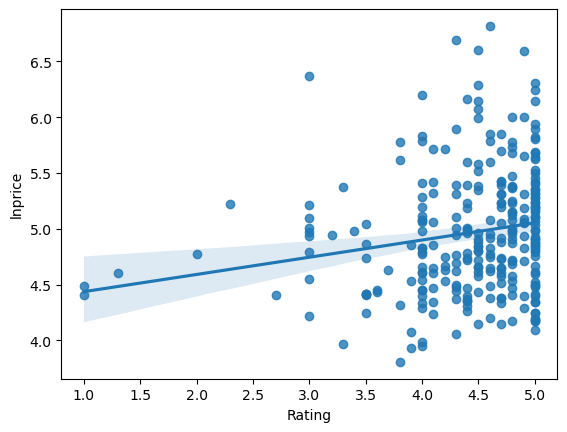

In [56]:
sns.regplot(y='lnprice', x='Rating', data=sorted_df)

Idk if we leave this graph or not, just to show that for example with rating and lnprice there's a positive relationship. But already made in visualisation so make the link with this part

# Supervised Machine Learning

In [57]:
y=df['lnprice']
#est ce que c'est mieux de prendre le ln?
features=df.drop(columns=['lnprice','Price per Night', 'Total Price'])#input

## 1. Prepare the data for ML algorithms

In [58]:
cat_col = [col for col in features if df[col].dtype == 'object']
dum_col = [col for col in features if df[col].dtype == 'int64']
num_col = [col for col in features if df[col].dtype == 'float64']

In [59]:
x=features[num_col]

## 2. Split train test sets

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (338, 7) (338,)
test data (85, 7) (85,)


In [62]:
numeric_columns=list(X_train.select_dtypes('float64').columns)
categorical_columns=list(X_train.select_dtypes('int64').columns)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', OneHotEncoder() ,categorical_columns),
])
#for numerical columns --> standardscaler; for categorical columns --> OneHotEncoder

X_train_scaled=pipeline.fit_transform(X_train)
X_test_scaled=pipeline.fit_transform(X_test)

## 3. Select and train a model

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [65]:
X_train_num=X_train[numeric_columns]
lin_reg.fit(X_train_num, y_train)

LinearRegression()

In [66]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_num, y_train), 2)))

R-squared for training dataset:0.3


In [67]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.3


**The R-squared is really low: what can we do abt it?**

In [68]:
lin_reg.coef_

array([ 0.00512534, -0.10119463,  0.03861193,  0.22124972,  0.05453361,
        0.0359317 , -0.01784811])

In [69]:
print('The coefficients of the features from the linear model:')
print(dict(zip(num_col+dum_col, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'Rating': 0.01, 'Appreciations': -0.1, 'Number of Guests': 0.04, 'Number of Bedrooms': 0.22, 'Number of Beds': 0.05, 'latitude': 0.04, 'longitude': -0.02}


## 5. Metrics/ Error measures

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)

In [71]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMSE: 0.45658088590435497


In [72]:
#1. Out-of-sample performance = test RMSE
y_test_pred = lin_reg.predict(X_test_scaled)    
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 0.41392706552408975


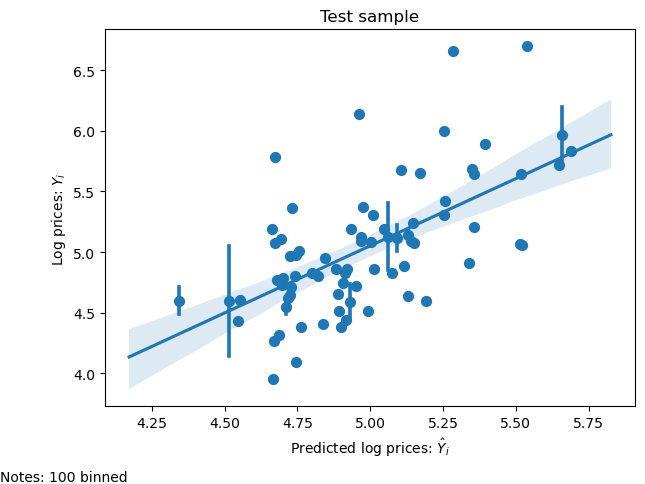

In [73]:
import seaborn as sns

g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")

plt.xlabel("Predicted log prices: $\hat{Y}_i$")
plt.ylabel("Log prices: $Y_i$")
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

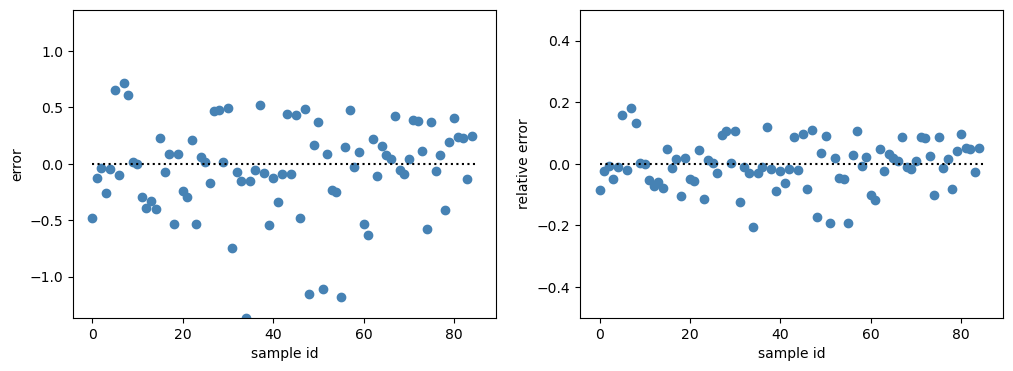

In [74]:
#Let us plot how good given and predicted values match on the training data set (sic !).
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)